In [1]:
import numpy as np
from sklearn.datasets import california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib.pylab import plt
from utils import *
%matplotlib inline
from vecstack import stacking

In [2]:
data=california_housing.fetch_california_housing()
x=data.data
y=data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2121)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [Ridge]
    fold  0:  [0.53766021]
    fold  1:  [0.54286198]
    fold  2:  [0.52780334]
    ----
    MEAN:     [0.53610851] + [0.00624481]
    FULL:     [0.53610851]

model  1:     [RandomForestRegressor]
    fold  0:  [0.34302532]
    fold  1:  [0.34405827]
    fold  2:  [0.34244269]
    ----
    MEAN:     [0.34317543] + [0.00066804]
    FULL:     [0.34317543]

model  2:     [ExtraTreesRegressor]
    fold  0:  [0.33525993]
    fold  1:  [0.33953447]
    fold  2:  [0.33372439]
    ----
    MEAN:     [0.33617293] + [0.00245825]
    FULL:     [0.33617293]

model  3:     [Pipeline]


/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  0:  [0.40708324]
    fold  1:  [0.38791229]


/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  2:  [0.37924839]
    ----
    MEAN:     [0.39141464] + [0.01163027]
    FULL:     [0.39141464]

model  4:     [GradientBoostingRegressor]
    fold  0:  [0.31253398]
    fold  1:  [0.31711912]
    fold  2:  [0.31317860]
    ----
    MEAN:     [0.31427723] + [0.00202668]
    FULL:     [0.31427723]

MSE -  0.20449885150880207
MAE -  0.3023451735720045


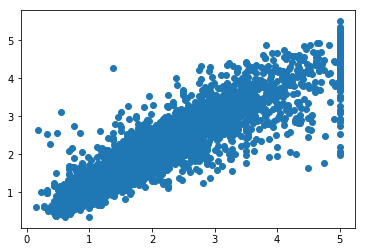

In [6]:
models = [Ridge(alpha=0.01),
          RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1),
          ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1),
          make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20))),
          GradientBoostingRegressor(n_estimators=580,max_depth=4)]
        
S_train, S_test = stacking(models, x_train, y_train, x_test, 
                           regression = True, metric = mean_absolute_error, n_folds = 3,
                           shuffle = True, random_state = 0, verbose = 2)

clf = Ridge(alpha=0.01)
clf = clf.fit(S_train, y_train)

preds = clf.predict(S_test)
plt_sct(y_test,preds)